# The Invasion of the Opioid Crisis on Life in the US

### A Data Science Project By Daniel Connolly and Bryce Mann

In this project, we will be investigating the opioid epidemic using data from the NSDUH. We hope to find interesting relationships between drug use and other variables measured by the NSDUH as well as the look at the use of opioids over time. In accordance with the guidelines of the NSDUH, we will not upload our data to our git repository and will not make any identifying information public through our study.

#### Reading the Data

We continually ran into memory errors trying to extract data from the 2002-2016 version of the NSDUH data. Eventually, we managed to get it to work for a few variables (less than 15) and so we ended up relying on that quite a bit in this report. However, we had not managed to make it work before going through the process of pickling the data for each individual year between 2002 and 2017, as you will see.

In [2]:
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from utils import decorate
from thinkstats2 import Hist, Pmf, Cdf
from thinkplot import Cdf
import seaborn as sns
sns.set(style='white')

In [3]:
import pandas as pd
import numpy as np

# Each individual year's data 2002-2017
nsduh_2002 = pd.read_pickle('nsduh_2002.pkl')
nsduh_2003 = pd.read_pickle('nsduh_2003.pkl')
nsduh_2004 = pd.read_pickle('nsduh_2004.pkl')
nsduh_2005 = pd.read_pickle('nsduh_2005.pkl')
nsduh_2006 = pd.read_pickle('nsduh_2006.pkl')
nsduh_2007 = pd.read_pickle('nsduh_2007.pkl')
nsduh_2008 = pd.read_pickle('nsduh_2008.pkl')
nsduh_2009 = pd.read_pickle('nsduh_2009.pkl')
nsduh_2010 = pd.read_pickle('nsduh_2010.pkl')
nsduh_2011 = pd.read_pickle('nsduh_2011.pkl')
nsduh_2012 = pd.read_pickle('nsduh_2012.pkl')
nsduh_2013 = pd.read_pickle('nsduh_2013.pkl')
nsduh_2014 = pd.read_pickle('nsduh_2014.pkl')
nsduh_2015 = pd.read_pickle('nsduh_2015.pkl')
nsduh_2016 = pd.read_pickle('nsduh_2016.pkl')
nsduh_2017 = pd.read_pickle('nsduh_2017.pkl')

# A few variables we were able to extract from the NSDUH's provided 2002-2016 dataset
nsduh = pd.read_pickle('nsduh_all_final.pkl')

#### Some Helper Functions for cleaning the data

The functions below are designed to clean the data specifically from the 2002-2016 NSDUH. They work on most individual years data, but were originally intended to work for that version. The cell below mostly handles replacing invalid data with NaN so that we can perform numpy operations on it.

In [4]:
## function to clean data
def clean_data(df):
    #1 = yes, 2 = no
    df.herever.replace([85,94,97], np.nan, inplace=True)
    
    #numerical age
    df.herage.replace([985,991,994,997,998], np.nan, inplace=True)
    
    #1 - within 30 days
    #2 - between 12 months and last 30 days
    #3 - more than 12 months ago
    df.irherrc.replace([9], np.nan, inplace=True)
    
    #1 = yes, 2 = no
    df.anlever.replace([-9, 97, 98], np.nan, inplace=True)
    df.anlever.replace([81,91], 2, inplace=True)
    
    #numerical age
    df.analage.replace([-9,981,985,991,994,997,998], np.nan, inplace=True)
    
    #1 - within 30 days
    #2 - between 12 months and last 30 days
    #3 - more than 12 months ago
    df.irpnrnmrec.replace([-9, 9], 2, inplace=True)
    
    #AGE2
    #1 = Respondent is 12 years old
    #2 = Respondent is 13 years old
    #3 = Respondent is 14 years old
    #4 = Respondent is 15 years old
    #5 = Respondent is 16 years old
    #6 = Respondent is 17 years old
    #7 = Respondent is 18 years old
    #8 = Respondent is 19 years old
    #9 = Respondent is 20 years old
    #10 = Respondent is 21 years old
    #11 = Respondent is 22 or 23 years old
    #12 = Respondent is 24 or 25 years old 
    #13 = Respondent is between 26 and 29 years old
    #14 = Respondent is between 30 and 34 years old 
    #15 = Respondent is between 35 and 49 years old 
    #16 = Respondent is between 50 and 64 years old 
    #17 = Respondent is 65 years old or older
    
    #irsex
    # 1 - male
    # 2 - female
    
    #IREDUHIGHST2
    #1 = Fifth grade or less grade completed ..............................................................................
    #2 = Sixth grade completed ..................................................................................................
    #3 = Seventh grade completed ..............................................................................................
    #4 = Eighth grade completed ................................................................................................
    #5 = Ninth grade completed ..................................................................................................
    #6 = Tenth grade completed ..................................................................................................
    #7 = Eleventh or Twelfth grade completed, no diploma .......................................................
    #8 = High school diploma/GED ............................................................................................
    #9 = Some college credit, but no degree ...............................................................................
    #10 = Associate's degree (for example, AA, AS) ..................................................................
    #11 = College graduate or higher .........................................................................................
    df.IREDUHIGHST2.replace([-9], np.nan, inplace=True)
    
    #respondent income: IRPINC3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................
    
    #household income: IRFAMIN3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................

    #type of area they live in
    # 1 - large metro
    # 2 - small metro
    # 3 - nonmetro
    df.COUTYP2.replace([-9], np.nan, inplace=True)
    
    #type of area they live in
    # 1 - large metro
    # 2 - small metro
    # 3 - nonmetro
    df.COUTYP4.replace([-9], np.nan, inplace=True)

In order to make the results more meaningful, we attemped to reinterpret the data. For instance, rather than leave the ages of the respondents as categorical data, we chose the upper bound of each category to be the age of the respondent. Though this has its limitations, we believe jittering the data should be able to help us resolve at least some of the issues we run into as a result of those limitations. We included comments explaining the data from the dataset, which shows why we reintrepreted the data as we did.

In [5]:
def reinterpret_data(df):
    
    #AGE2
    #1 = Respondent is 12 years old
    #2 = Respondent is 13 years old
    #3 = Respondent is 14 years old
    #4 = Respondent is 15 years old
    #5 = Respondent is 16 years old
    #6 = Respondent is 17 years old
    #7 = Respondent is 18 years old
    #8 = Respondent is 19 years old
    #9 = Respondent is 20 years old
    #10 = Respondent is 21 years old
    #11 = Respondent is 22 or 23 years old
    #12 = Respondent is 24 or 25 years old 
    #13 = Respondent is between 26 and 29 years old
    #14 = Respondent is between 30 and 34 years old 
    #15 = Respondent is between 35 and 49 years old 
    #16 = Respondent is between 50 and 64 years old 
    #17 = Respondent is 65 years old or older
    #last value corresponds to 65+
    age_list = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 29, 34, 49, 64, 65]
    df.AGE2.replace(list(range(1,18)), age_list, inplace=True)
    
    #IREDUHIGHST2
    #1 = Fifth grade or less grade completed ..............................................................................
    #2 = Sixth grade completed ..................................................................................................
    #3 = Seventh grade completed ..............................................................................................
    #4 = Eighth grade completed ................................................................................................
    #5 = Ninth grade completed ..................................................................................................
    #6 = Tenth grade completed ..................................................................................................
    #7 = Eleventh or Twelfth grade completed, no diploma .......................................................
    #8 = High school diploma/GED ............................................................................................
    #9 = Some college credit, but no degree ...............................................................................
    #10 = Associate's degree (for example, AA, AS) ..................................................................
    #11 = College graduate or higher .........................................................................................
    #roughly replace these with years of education
    edu_list = [6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18]
    df.IREDUHIGHST2.replace(list(range(1,12)), edu_list, inplace=True)
    
        #respondent income: IRPINC3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more 
    #in thousands, integers being replaced with upper bound of bin
    #80 corresponds to over 75,000
    inc_list = [10, 20, 30, 40, 50, 75, 80]
    df.IRPINC3.replace(list(range(1,8)), inc_list, inplace=True)
    
        #household income: IRFAMIN3
#     1 = Less than $10,000 (Including Loss) ..............................................................................
#     2 = $10,000 - $19,999 .........................................................................................................
#     3 = $20,000 - $29,999 .........................................................................................................
#     4 = $30,000 - $39,999 .........................................................................................................
#     5 = $40,000 - $49,999 .........................................................................................................
#     6 = $50,000 - $74,999 .........................................................................................................
#     7 = $75,000 or more ..............................
    df.IRFAMIN3.replace(list(range(1,8)), inc_list, inplace=True)
    

Now, we need to call the cleaning functions.

In [6]:
reinterpret_data(nsduh)
clean_data(nsduh)
nsduh.head()

,QUESTID2,year,herever,herage,irherrc,anlever,analage,irpnrnmrec,AGE2,irsex,...,COUTYP2,COUTYP4,NOMARR2,service,health,crkever,crkage,crakrec,crkyfu,heryfu
0,02000024,2002,2.0,NaN,NaN,1.0,20.0,2,29,1,...,1.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
1,02000239,2002,2.0,NaN,NaN,2.0,NaN,2,25,2,...,1.0,NaN,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2,02000248,2002,2.0,NaN,NaN,1.0,20.0,2,20,1,...,3.0,NaN,0.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN
3,02000248,2002,2.0,NaN,NaN,1.0,20.0,2,20,1,...,3.0,NaN,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
4,02000248,2003,2.0,NaN,NaN,2.0,NaN,2,25,1,...,2.0,NaN,0.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN


In [7]:
# An array to allow us to iterate through all the individual year's data
dfs = [nsduh_2002, nsduh_2003, nsduh_2004, nsduh_2005,nsduh_2006,
       nsduh_2007, nsduh_2008, nsduh_2009, nsduh_2010, nsduh_2011, 
       nsduh_2012, nsduh_2013, nsduh_2014, nsduh_2015, nsduh_2016, 
       nsduh_2017]

We wrote the remove_categorical function below in order to try and remove the categorical data, which made up nearly all of the data in the datasets, so that we could perform numpy operations. It is similar to the reinterpret and clean functions we saw earlier, except it is designed to work on all of the categorical columns from each dataset.

In [8]:
def remove_categorical(df):
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [9]:
for df in dfs:
    remove_categorical(df)

Now, we came up with a way to iterate through each individual year's data, after having removed the categorical data, and add the information to a dictionary we could plot

In [46]:
d = dict()
d2 = dict()
d3 = dict()
for df in dfs:
    d[df['year'].iloc[0]] = 100*(len(df[df.herever == 0])/len(df))
    d2[df['year'].iloc[0]] = 100*(len(df[df.crkever == 0])/len(df))
    d3[df['year'].iloc[0]] = 100*(len(df[df.lsd == 0])/len(df))

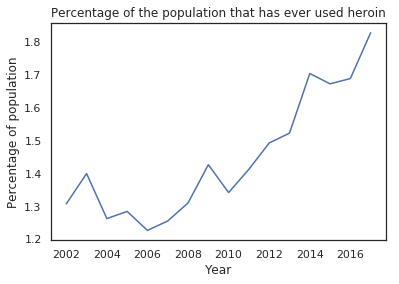

In [47]:
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used heroin')
plt.show()

The percentage of the total population that uses heroin appears to have increased by 0.5% between 2002 and 2016. Given that we are looking into the opioid epidemic, we expected to see an increase. 0.5% of 320 million people in the United States is 1.625 million people. If the amount of people using heroin has increased by that much over the past fourteen years, something is definitely going on.

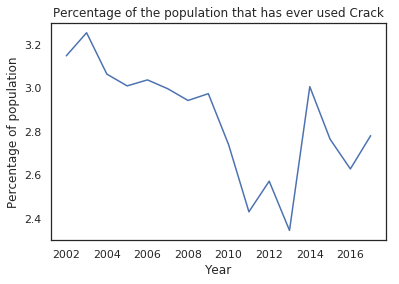

In [136]:
lists2 = sorted(d2.items()) # sorted by key, return a list of tuples

x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples

plt.plot(x2, y2,label='crack')
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used Crack')
plt.show()

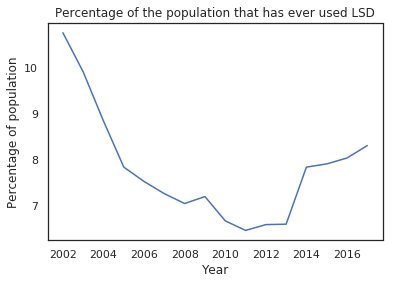

In [137]:
lists3 = sorted(d3.items()) # sorted by key, return a list of tuples

x3, y3 = zip(*lists3) # unpack a list of pairs into two tuples

plt.plot(x3, y3, label='lsd')
plt.xlabel('Year')
plt.ylabel('Percentage of population')
plt.title('Percentage of the population that has ever used LSD')
plt.show()

As these graphs show, the use of both crack and lsd dropped steadily between the early 2000s and 2013, before rising to some extent in 2014, although neither reaches the level it was at in 2002. In contrast, the use of heroin has been increasing throughout this time period.

Next, we chose to utilize pandas groupby objects in order to look into some more information about heroin users and to compare heroin users to non-heroin users.

In [12]:
grouped2 = nsduh.groupby('AGE2')

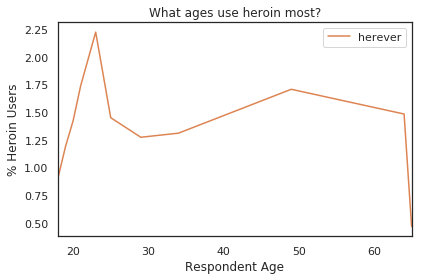

In [13]:
series = 100*(2 - grouped2['herever'].mean())
series.plot(color='C1')
decorate(xlabel='Respondent Age', 
         ylabel='% Heroin Users',
         title='What ages use heroin most?')

Average heroin use peaks in the early twenties at about 2.25 percent of the data. We must keep in mind that we reinterpreted the data as the upper bound of each age group in the 2002-2016 dataset. Regardless, that would likely remain the peak usage point.

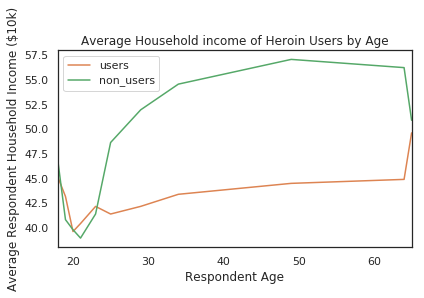

In [14]:
users = nsduh[nsduh.herever == 1]
non_users = nsduh[nsduh.herever == 2]
grouped3 = users.groupby('AGE2')
series1 = grouped3['IRFAMIN3'].mean()
series1.plot(color='C1', label='users')
grouped3 = non_users.groupby('AGE2')
series2 = grouped3['IRFAMIN3'].mean()
series2.plot(color='C2', label='non_users')
decorate(xlabel='Respondent Age', 
         ylabel='Average Respondent Household Income ($10k)',
         title='Average Household income of Heroin Users by Age')

The household incomes of all respondents dips in the late teens and early twenties, but then the users and non-users diverge. The users household incomes greatly increase, while the users household incomes only barely continue rising. At its highest point, the average household income differs by more than $10,000 between heroin users and non-heroin users.

Limitations include: In getting the household income data, we used the upper bound (roughly, except for the highest income category) of the income category as the actual numerical income.

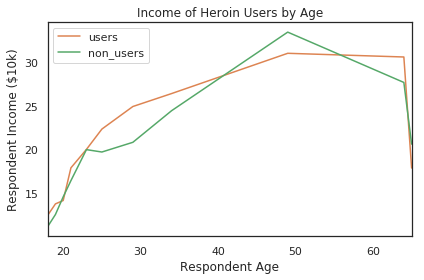

In [15]:
grouped3 = users.groupby('AGE2')
series1 = grouped3['IRPINC3'].mean()
series1.plot(color='C1', label='users')
grouped3 = non_users.groupby('AGE2')
series2 = grouped3['IRPINC3'].mean()
series2.plot(color='C2', label='non_users')
decorate(xlabel='Respondent Age', 
         ylabel='Respondent Income ($10k)',
         title='Income of Heroin Users by Age')

The personal incomes of the users and non-users track each other though. Since these track each other, it could suggest the difference in household incomes is due to non-heroin users getting married at higher rates or getting more education or something along those lines.

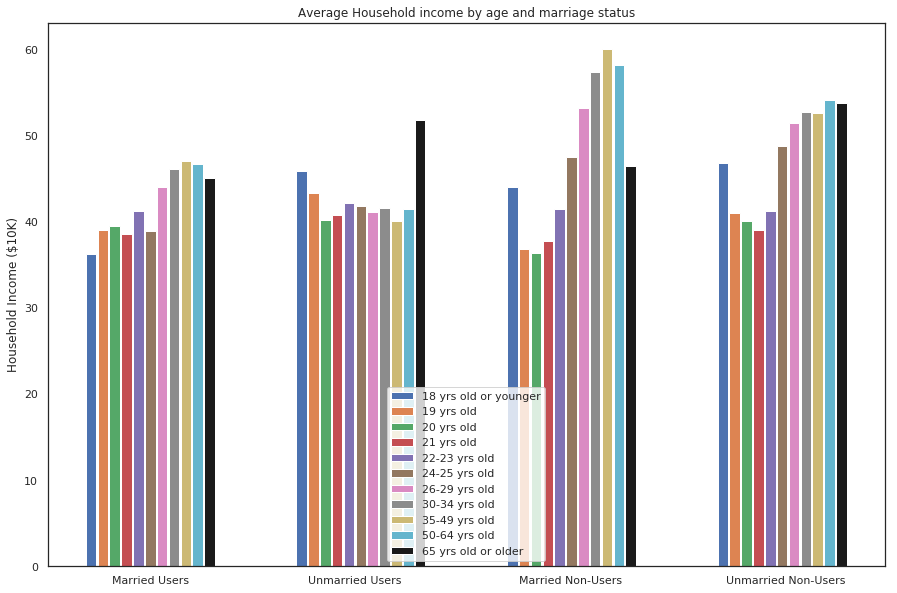

In [135]:
grouped41 = married_users.groupby('AGE2')
grouped42 = unmarried_users.groupby('AGE2')
grouped43 = married_nonusers.groupby('AGE2')
grouped44 = unmarried_nonusers.groupby('AGE2')
i = 0
x=0
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','k']
groups = [grouped41,grouped42,grouped43,grouped44]
for groupedObj in groups:
    for name, group in groupedObj:
        ax.bar(x+i*0.225, group.IRFAMIN3.mean(),width=0.2,color=colors[i],align='center')
        i=i+1
    i=0
    x=x+4

ax.legend(['18 yrs old or younger', '19 yrs old', '20 yrs old', '21 yrs old', '22-23 yrs old', '24-25 yrs old', '26-29 yrs old', '30-34 yrs old', '35-49 yrs old', '50-64 yrs old', '65 yrs old or older'], loc=8)

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([1.125,5,9.1,13.2])
ax.set_xticklabels(('Married Users', 'Unmarried Users', 'Married Non-Users', 'Unmarried Non-Users'))
ax.set_title('Average Household income by age and marriage status')


plt.show()

Your earning potential certainly seems higher across the board if you are not using heroin. Those who are married also seem to earn more regardless of the use of drugs.

In [133]:
married_users = users[(users.NOMARR2 == 1) | (users.NOMARR2 == 2)]
unmarried_users = users[users.NOMARR2 == 0]
married_nonusers = non_users[(non_users.NOMARR2 == 1) | (non_users.NOMARR2 == 2)]
unmarried_nonusers = non_users[non_users.NOMARR2 == 0]
userMarPct = len(married_users)/(len(married_users)+len(unmarried_users))
nonuserMarPct = len(married_nonusers)/(len(married_nonusers)+len(unmarried_nonusers))
userMarPct, nonuserMarPct

(0.3875249900039984, 0.3428117014404864)

Heroin users are getting married at a higher rate. This seems to suggest the difference in incomes is not due to marital status.

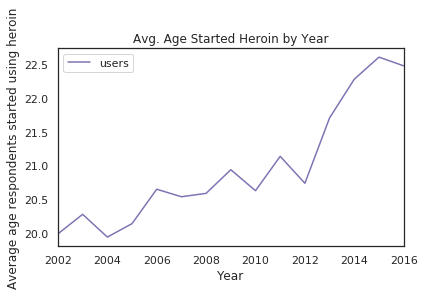

In [107]:
grouped3 = users.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(color='C4', label='users')
decorate(xlabel='Year', 
         ylabel='Average age respondents started using heroin',
         title='Avg. Age Started Heroin by Year')

The average age of people starting to use heroin has jumped by 2 years between 2002 and 2014. This would suggest opioids are starting to creep into the lives of people besides those in their teens and twenties.

Next, we'll look into this more by plotting the starting age percentiles of heroin users over time.

In [17]:
from thinkstats2 import Pmf, Cdf
ps = [95, 75, 50, 25, 5]
res = []
grouped3 = users.groupby('year')
for name, group in grouped3['herage']:
    percentiles = Cdf(group).Percentiles(ps)
    res.append(percentiles)
xs = grouped3.groups.keys()
xs = sorted(xs)
rows = np.transpose(res)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

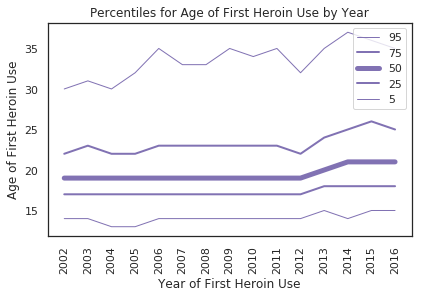

In [18]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C4')
    
decorate(xlabel='Year of First Heroin Use',
         ylabel='Age of First Heroin Use',
         title='Percentiles for Age of First Heroin Use by Year')
plt.xticks(rotation=90)

All percentiles were pretty steady until 2012, when they began to increase in heroin use a little bit. It looks like the average starting age for all percentiles besides the lowest percentile (5% - teens) is increasing.

The cell below combined the use of heroin and painkiller users into a single dataframe called users, and the non-users into a separate dataframe. This will allow us to analyze trends beyond those that just apply to heroin or painkillers individually. Note that the data for this variable regarding non-medical painkiller use ended in 2014.

In [19]:
grouped = nsduh.groupby(['herever', 'anlever'])
grouped2 = nsduh.groupby(['year','herever'])
df4 = grouped2.get_group(('2015',1.0))
df5 = grouped2.get_group(('2016',1.0))
df1 = grouped.get_group((1.0,1.0))
df2 = grouped.get_group((2.0,1.0))
df3 = grouped.get_group((1.0,2.0))
users = pd.concat([df1, df2, df3, df4, df5])
time_users = users.groupby('year')
non_users = grouped.get_group((2.0,2.0))

Now we'll look at average age of both first time heroin users and first time painkiller users.

In [20]:
d_her = dict()
d_an = dict()
for x in list(range(2002,2017)):
    df = time_users.get_group(str(x))
    her_val = sum(df['herage'].dropna())/len(df['herage'].dropna())
    if x<=2014:
        an_val = sum(df['analage'].dropna())/len(df['analage'].dropna())
        d_an[x] = an_val
    d_her[x] = her_val

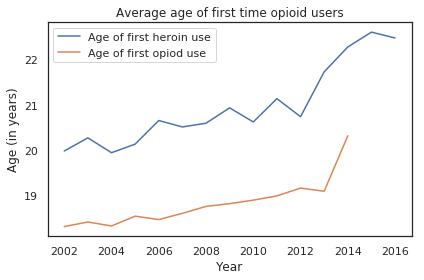

In [21]:
plt.plot(list(d_her.keys()),list(d_her.values()),label='Age of first heroin use')
plt.plot(list(d_an.keys()),list(d_an.values()), label='Age of first opiod use')
decorate(xlabel='Year',ylabel='Age (in years)',
         title='Average age of first time opioid users')
plt.legend()
plt.show()

It appears that both painkiller use and heroin use are increasing in recent years. Unfortunately, the data for painkiller ended in 2014, as we mentioned earlier.

We'll also group people into dataframes representing the areas they live in. The question code changed, but the question remained nearly the same, which is why we checked both 'COUTYP2' and 'COUTYP4'.

In [22]:
urban = nsduh[(nsduh.COUTYP2 == 1) | (nsduh.COUTYP4 == 1)]
suburb = nsduh[(nsduh.COUTYP2 == 2) | (nsduh.COUTYP4 == 2)]
rural = nsduh[(nsduh.COUTYP2 == 3) | (nsduh.COUTYP4 == 3)]

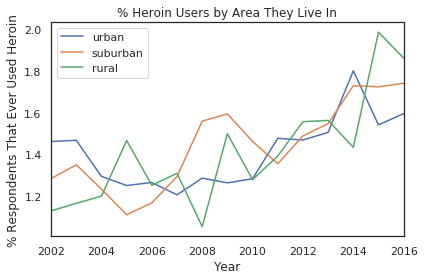

In [23]:
grouped3 = urban.groupby('year')
series1 = 100*(2- grouped3['herever'].mean())
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = 100*(2 - grouped4['herever'].mean())
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = 100*(2 - grouped5['herever'].mean())
series3.plot(label='rural')
decorate(xlabel='Year', 
         ylabel='% Respondents That Ever Used Heroin',
         title='% Heroin Users by Area They Live In')

We plotted the percentage of heroin users in the population by the area in which the population lived (rural, urban, suburban - or, more technically, nonmetro, large metro, and small metro, respectively) The areas don't seem to be all that different. It is interesting, though, that suburban use has increased the most, while urban use has increased the less. That would suggest the problem is worst in suburbs.

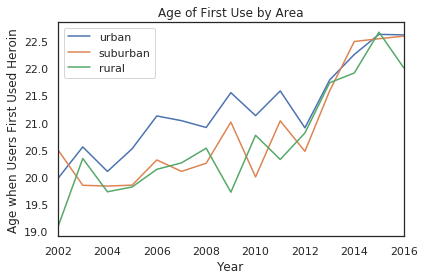

In [24]:
grouped3 = urban.groupby('year')
series1 = grouped3['herage'].mean()
series1.plot(label='urban')
grouped4 = suburb.groupby('year')
series2 = grouped4['herage'].mean()
series2.plot(label='suburban')
grouped5 = rural.groupby('year')
series3 = grouped5['herage'].mean()
series3.plot(label='rural')
decorate(xlabel='Year', 
         ylabel='Age when Users First Used Heroin',
         title='Age of First Use by Area')

The age of heroin first use is rising everywhere. It does not appear to be a function of where you live, at least in this dataset.

Now, we'll further group the respondents by both the area they live in and whether or not they use heroin or non-medically use painkillers.

In [25]:
urban_users = users[(users.COUTYP2 == 1) | (users.COUTYP4 == 1)]
suburb_users = users[(users.COUTYP2 == 2) | (users.COUTYP4 == 2)]
rural_users = users[(users.COUTYP2 == 3) | (users.COUTYP4 == 3)]
urban_nonusers = non_users[(non_users.COUTYP2 == 1) | (non_users.COUTYP4 == 1)]
suburb_nonusers = non_users[(non_users.COUTYP2 == 2) | (non_users.COUTYP4 == 2)]
rural_nonusers = non_users[(non_users.COUTYP2 == 3) | (non_users.COUTYP4 == 3)]

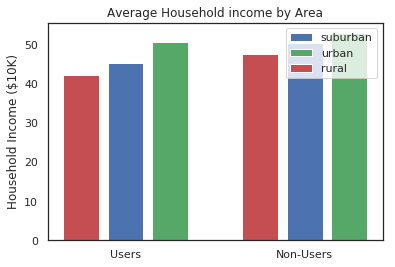

In [26]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRFAMIN3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRFAMIN3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRFAMIN3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Household Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Household income by Area')

plt.show()

Users and non-users are pretty similar here. Those in urban areas tend to have the highest household incomes, with those in rural areas having the lowest household income. The data for users suggest users have lower household incomes across the board by a few thousand dollars. Again, we must acknowledge that in getting the household income data, we used the upper bound (roughly, except for the highest income category) of the income category as the actual numerical income.

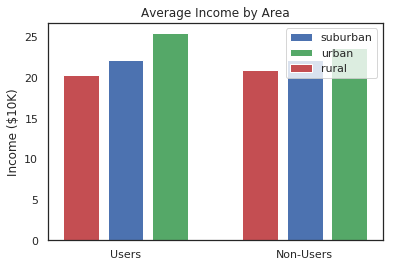

In [27]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['IRPINC3'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['IRPINC3'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['IRPINC3'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Income ($10K)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Average Income by Area')

plt.show()

Users and non-users (of heroin and non-medical painkillers) are even more similar here in terms of their own average incomes.

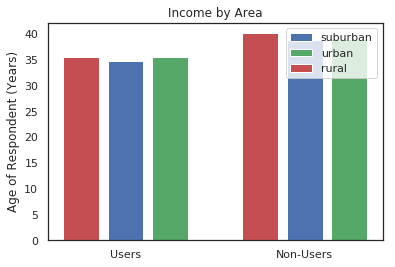

In [67]:
ax = plt.subplot(111)
ax.bar(0, suburb_users['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(0.25, urban_users['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(-0.25, rural_users['AGE2'].mean(),width=0.2,color='r',align='center')
ax.bar(1, suburb_nonusers['AGE2'].mean(),width=0.2,color='b',align='center')
ax.bar(1.25, urban_nonusers['AGE2'].mean(),width=0.2,color='g',align='center')
ax.bar(.75, rural_nonusers['AGE2'].mean(),width=0.2,color='r',align='center')
ax.legend(('suburban', 'urban', 'rural'))

ax.set_ylabel('Age of Respondent (Years)')
ax.set_xticks([0,1])
ax.set_xticklabels(('Users', 'Non-Users'))
ax.set_title('Income by Area')

plt.show()

Non-user respondents appear to be older across the board. In other words, of those who responded to the survey, those who had used painkillers or heroin tended to be younger than those who hadn't.